In [1]:
#import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [3]:
 #Read the data as a CSV file
data1 = pd.read_csv(Path('project4data.csv'))
data1.head()

,"CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)","SUBSTR(P.PROGRAM_ID,6,2)","DECODE(SUBSTR(EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)",ACCEPTANCE_DATE,ARREST_DATE,REFERRAL_DATE,ACCEPTANCE_TYPE,EXIT_DATE,REFERRAL_SOURCE,DOB,...,DIAGNOSIS_REASON,DIAGNOSIS_LEVEL,EMP_ASSIST_TYPE,PRIMARY_DRUG_CHOICE,SECONDARY_DRUG_CHOICE,COUNT(DISTINCTSI.SANC_INCENT_ID),COUNT(DISTINCTT.TREATMENT_ID),COUNT(DISTINCTDT.DRUG_TEST_ID),COUNT(DISTINCTEA.EMP_ASSIST_ID),COUNT(DISTINCTJS_HEARING_ID)
0,01016FD1342018BDC00008,FD,1,10/22/2018,10/17/2018,7/9/2018,post adjudication,7/6/2020,prosecutor,6/13/1986,...,substance-induced/related,Primary,NaN,amphetamines/Meth(amphetamines),crack/cocaine,1,1,1,0,0
1,01016FD1342018BDC00008,FD,1,10/22/2018,10/17/2018,7/9/2018,post adjudication,7/6/2020,prosecutor,6/13/1986,...,substance-induced/related,NaN,NaN,amphetamines/Meth(amphetamines),crack/cocaine,0,0,21,0,1
2,01016FD1342018BDC00017,FD,1,10/22/2018,8/8/2018,8/13/2018,probation revocation,11/9/2020,defense attorney,12/31/1988,...,substance-induced/related,Primary,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,5,0,3
3,01016FD1342018BDC00019,FD,1,11/5/2018,6/1/2018,9/5/2018,post adjudication,7/6/2020,defense attorney,5/29/1989,...,substance-induced/related,Primary,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,0,0,0
4,01016FD1342018BDC00019,FD,1,11/5/2018,6/1/2018,9/5/2018,post adjudication,7/6/2020,defense attorney,5/29/1989,...,substance-induced/related,NaN,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),0,0,6,0,1


In [4]:
# import io
# data1 = pd.read_csv(io.BytesIO(uploaded['project4data.csv']))
# data1.head()

In [4]:
# #Read the data as a CSV file
# data = pd.read_csv(Path('project4data.csv'))
# data.head()

In [5]:
#Descriptive for our continuous variables
data1.describe()

,"DECODE(SUBSTR(EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)",COUNT(DISTINCTSI.SANC_INCENT_ID),COUNT(DISTINCTT.TREATMENT_ID),COUNT(DISTINCTDT.DRUG_TEST_ID),COUNT(DISTINCTEA.EMP_ASSIST_ID),COUNT(DISTINCTJS_HEARING_ID)
count,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000
mean,0.607370,1.313922,6.654231,12.721338,0.001137,2.635123
std,0.488391,6.927789,15.650756,47.339809,0.033710,10.879867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,5.000000,0.000000,1.000000
75%,1.000000,1.000000,7.000000,15.000000,0.000000,3.000000
max,1.000000,396.000000,396.000000,1664.000000,1.000000,495.000000


In [6]:
#Determine # of missing rows in the variables
data1.isna().sum()

CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)                             0
SUBSTR(P.PROGRAM_ID,6,2)                                                  0
DECODE(SUBSTR(EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)       0
ACCEPTANCE_DATE                                                          13
ARREST_DATE                                                              63
REFERRAL_DATE                                                           104
ACCEPTANCE_TYPE                                                          13
EXIT_DATE                                                                 0
REFERRAL_SOURCE                                                          60
DOB                                                                       0
GENDER                                                                    0
RACE                                                                      0
EMP_UNSTABLE_CHRONIC                                                      0
DIAGNOSIS_RE

In [7]:
#View the types of variables 
data1.dtypes

CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)                          object
SUBSTR(P.PROGRAM_ID,6,2)                                               object
DECODE(SUBSTR(EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)     int64
ACCEPTANCE_DATE                                                        object
ARREST_DATE                                                            object
REFERRAL_DATE                                                          object
ACCEPTANCE_TYPE                                                        object
EXIT_DATE                                                              object
REFERRAL_SOURCE                                                        object
DOB                                                                    object
GENDER                                                                 object
RACE                                                                   object
EMP_UNSTABLE_CHRONIC                                            

In [8]:
#Convert Data objects to Datetime variables 
data1['ACCEPTANCE_DATE'] = pd.to_datetime(data1['ACCEPTANCE_DATE'])

data1['ARREST_DATE'] = pd.to_datetime(data1['ARREST_DATE'])

data1['REFERRAL_DATE'] = pd.to_datetime(data1['REFERRAL_DATE'])
data1['EXIT_DATE'] = pd.to_datetime(data1['EXIT_DATE'])
data1['DOB'] = pd.to_datetime(data1['DOB'])

#Consider writing for loop


In [9]:

 #obtain Age from Date of Birth
# import datetime as dt

now = pd.to_datetime('now')

data1['age'] = (now - data1['DOB']).dt.total_seconds() / (60*60*24*365.25)
data1['age'].describe()




count    4396.000000
mean       38.740820
std        11.713486
min         1.507583
25%        30.276234
50%        37.072264
75%        46.178356
max        81.072264
Name: age, dtype: float64

In [10]:
#Calculate difference in days between arrest to acceptance

data1['time_arrest_accept'] = (data1['ACCEPTANCE_DATE'] - data1['ARREST_DATE']).astype('timedelta64[D]').astype('float')

#data1['time_arrest_accept'] = data1['time_arrest_accept'].dt.day

data1['time_arrest_accept'].describe()
#data1['time_arrest_accept'].dtypes

###########
######.astype('timedelta64[D]').astype('float')
####This was required to convert the format of 23 days for example to a true float variable

count     4327.000000
mean       243.823434
std        416.706577
min      -7670.000000
25%         58.000000
50%        127.000000
75%        307.000000
max      10141.000000
Name: time_arrest_accept, dtype: float64

In [11]:
#Filter data based on reasonable age and differences between arrest dates and program acceptance
person_data = data1[(data1.age > 15) & (data1.time_arrest_accept > 0)]
person_data.head()

,"CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)","SUBSTR(P.PROGRAM_ID,6,2)","DECODE(SUBSTR(EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)",ACCEPTANCE_DATE,ARREST_DATE,REFERRAL_DATE,ACCEPTANCE_TYPE,EXIT_DATE,REFERRAL_SOURCE,DOB,...,EMP_ASSIST_TYPE,PRIMARY_DRUG_CHOICE,SECONDARY_DRUG_CHOICE,COUNT(DISTINCTSI.SANC_INCENT_ID),COUNT(DISTINCTT.TREATMENT_ID),COUNT(DISTINCTDT.DRUG_TEST_ID),COUNT(DISTINCTEA.EMP_ASSIST_ID),COUNT(DISTINCTJS_HEARING_ID),age,time_arrest_accept
0,01016FD1342018BDC00008,FD,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,1986-06-13,...,NaN,amphetamines/Meth(amphetamines),crack/cocaine,1,1,1,0,0,35.440505,5.0
1,01016FD1342018BDC00008,FD,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,1986-06-13,...,NaN,amphetamines/Meth(amphetamines),crack/cocaine,0,0,21,0,1,35.440505,5.0
2,01016FD1342018BDC00017,FD,1,2018-10-22,2018-08-08,2018-08-13,probation revocation,2020-11-09,defense attorney,1988-12-31,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,5,0,3,32.888828,75.0
3,01016FD1342018BDC00019,FD,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,1989-05-29,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,0,0,0,32.480889,157.0
4,01016FD1342018BDC00019,FD,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,1989-05-29,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),0,0,6,0,1,32.480889,157.0


In [12]:
#Display duplicate data within the dataframe
person_data[person_data.duplicated(keep=False)]

,"CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)","SUBSTR(P.PROGRAM_ID,6,2)","DECODE(SUBSTR(EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)",ACCEPTANCE_DATE,ARREST_DATE,REFERRAL_DATE,ACCEPTANCE_TYPE,EXIT_DATE,REFERRAL_SOURCE,DOB,...,EMP_ASSIST_TYPE,PRIMARY_DRUG_CHOICE,SECONDARY_DRUG_CHOICE,COUNT(DISTINCTSI.SANC_INCENT_ID),COUNT(DISTINCTT.TREATMENT_ID),COUNT(DISTINCTDT.DRUG_TEST_ID),COUNT(DISTINCTEA.EMP_ASSIST_ID),COUNT(DISTINCTJS_HEARING_ID),age,time_arrest_accept


In [13]:
#Rename Variables
person_data = person_data.rename(columns={"DECODE(SUBSTR(EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)": 'GRADUATED',
                              "CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)": 'PARTICIPANT_ID', 
                              'SUBSTR(P.PROGRAM_ID,6,2)': 'PROGRAM_TYPE',
                              'COUNT(DISTINCTSI.SANC_INCENT_ID)': 'No_SANC_INCENT',
                              'COUNT(DISTINCTT.TREATMENT_ID)': 'No_TREATMENTS',
                              'COUNT(DISTINCTDT.DRUG_TEST_ID)': 'No_DRUG_TEST',
                              'COUNT(DISTINCTEA.EMP_ASSIST_ID)': 'No_EMP_ASSIST',
                              'COUNT(DISTINCTJS_HEARING_ID)': 'No_HEARING',
                              'age': 'AGE',
                              'time_arrest_accept': 'DAYS_TO_ACCEPTANCE'
                              })
person_data.head()

,PARTICIPANT_ID,PROGRAM_TYPE,GRADUATED,ACCEPTANCE_DATE,ARREST_DATE,REFERRAL_DATE,ACCEPTANCE_TYPE,EXIT_DATE,REFERRAL_SOURCE,DOB,...,EMP_ASSIST_TYPE,PRIMARY_DRUG_CHOICE,SECONDARY_DRUG_CHOICE,No_SANC_INCENT,No_TREATMENTS,No_DRUG_TEST,No_EMP_ASSIST,No_HEARING,AGE,DAYS_TO_ACCEPTANCE
0,01016FD1342018BDC00008,FD,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,1986-06-13,...,NaN,amphetamines/Meth(amphetamines),crack/cocaine,1,1,1,0,0,35.440505,5.0
1,01016FD1342018BDC00008,FD,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,1986-06-13,...,NaN,amphetamines/Meth(amphetamines),crack/cocaine,0,0,21,0,1,35.440505,5.0
2,01016FD1342018BDC00017,FD,1,2018-10-22,2018-08-08,2018-08-13,probation revocation,2020-11-09,defense attorney,1988-12-31,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,5,0,3,32.888828,75.0
3,01016FD1342018BDC00019,FD,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,1989-05-29,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,0,0,0,32.480889,157.0
4,01016FD1342018BDC00019,FD,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,1989-05-29,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),0,0,6,0,1,32.480889,157.0


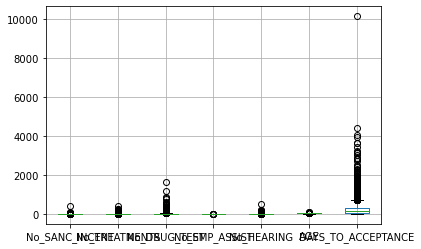

In [14]:
 import seaborn as sns

# # a = sns.boxplot("No_SANC_INCENT", "No_TREATMENTS", "No_DRUG_TEST", "No_EMP_ASSIST", "No_HEARING", "age", "time_arrest_accept", data=data2)
# # plt.show()
# data2.dtypes
#Boxplot of continuous variables in the dataset. 
boxplot = person_data.boxplot(column=["No_SANC_INCENT", "No_TREATMENTS", "No_DRUG_TEST", "No_EMP_ASSIST", "No_HEARING", "AGE", 'DAYS_TO_ACCEPTANCE' ])

#work to expand box to make it visable
#consider truncating if value >=... the value=... before normalizing because values will be off

#####Statistically test of outliers is another option: IsolationForest in SKLearn

#Need to recode that 'time_arrest_accept'*******************************************

In [15]:
#correlation Table
variables = person_data[["No_SANC_INCENT", "No_TREATMENTS", "No_DRUG_TEST", "No_EMP_ASSIST", "No_HEARING", "AGE", 'DAYS_TO_ACCEPTANCE' ]]
variables.corr(method='spearman')
#These are spearman correlation coefficients for non-normal data.  
#Some of the Pearson correlations are high, but not appropriate for non-normal data. 

,No_SANC_INCENT,No_TREATMENTS,No_DRUG_TEST,No_EMP_ASSIST,No_HEARING,AGE,DAYS_TO_ACCEPTANCE
No_SANC_INCENT,1.000000,0.332865,0.367314,0.005824,0.441184,-0.021374,-0.048313
No_TREATMENTS,0.332865,1.000000,0.572923,0.033954,0.498878,-0.005341,-0.040967
No_DRUG_TEST,0.367314,0.572923,1.000000,0.023738,0.472835,0.087002,0.004159
No_EMP_ASSIST,0.005824,0.033954,0.023738,1.000000,-0.016868,0.011449,0.003392
No_HEARING,0.441184,0.498878,0.472835,-0.016868,1.000000,-0.002558,-0.032673
AGE,-0.021374,-0.005341,0.087002,0.011449,-0.002558,1.000000,0.102578
DAYS_TO_ACCEPTANCE,-0.048313,-0.040967,0.004159,0.003392,-0.032673,0.102578,1.000000


<AxesSubplot:>

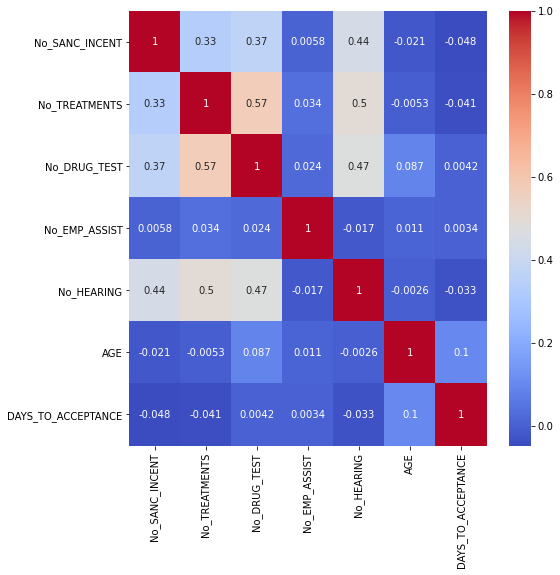

In [16]:
#Spearman correlation heatmap
plt.figure(figsize=(8,8))
sns.heatmap(variables.corr(method='spearman'), annot=True, cmap="coolwarm")

In [17]:
 #Read the data as a CSV file
EMPLOY_ED = pd.read_csv(Path('emp_educ_income.csv'))
EMPLOY_ED.head()

,"CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)",EDUCATION_LEVEL,EMP_STATUS,INCOME_LEVEL,RESIDENCE_COUNTY
0,01034MH147349fbcdf-fff8-43bc-bcf4-e9aec7e414bb,high school/GED,unemployed,No income,Ware
1,01034MH147f6f32042-9eb7-42a4-ba76-2032adff4cdf,high school/GED,part-time more than 20 hours,"$10,000-$14,999",Ware
2,10107FT1027dded030-86bf-49e7-91eb-7a8a2af8a111,high school/GED,full-time,"$15,000-$19,999",Newton
3,09069FT23093b15f5f-9561-42f5-8433-8963dc937626,high school/GED,full-time,"$25,000-$34,999",Hall
4,06031FD112a9de5ae5-de0e-42c8-9e64-dcb708ebf235,some high,full-time,"$15,000-$19,999",Clayton


In [19]:
#load in employment and education data
EMPLOY_ED = EMPLOY_ED.rename(columns={"CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)":'PARTICIPANT_ID'})
EMPLOY_ED.head()

,PARTICIPANT_ID,EDUCATION_LEVEL,EMP_STATUS,INCOME_LEVEL,RESIDENCE_COUNTY
0,01034MH147349fbcdf-fff8-43bc-bcf4-e9aec7e414bb,high school/GED,unemployed,No income,Ware
1,01034MH147f6f32042-9eb7-42a4-ba76-2032adff4cdf,high school/GED,part-time more than 20 hours,"$10,000-$14,999",Ware
2,10107FT1027dded030-86bf-49e7-91eb-7a8a2af8a111,high school/GED,full-time,"$15,000-$19,999",Newton
3,09069FT23093b15f5f-9561-42f5-8433-8963dc937626,high school/GED,full-time,"$25,000-$34,999",Hall
4,06031FD112a9de5ae5-de0e-42c8-9e64-dcb708ebf235,some high,full-time,"$15,000-$19,999",Clayton


In [20]:
#Display duplicate data within the dataframe
EMPLOY_ED[EMPLOY_ED.duplicated(keep=False)]

,PARTICIPANT_ID,EDUCATION_LEVEL,EMP_STATUS,INCOME_LEVEL,RESIDENCE_COUNTY


In [21]:
#join the employment with the court and treatment data
joined = person_data.merge(EMPLOY_ED, on='PARTICIPANT_ID', how='inner')
joined.head(10)

,PARTICIPANT_ID,PROGRAM_TYPE,GRADUATED,ACCEPTANCE_DATE,ARREST_DATE,REFERRAL_DATE,ACCEPTANCE_TYPE,EXIT_DATE,REFERRAL_SOURCE,DOB,...,No_TREATMENTS,No_DRUG_TEST,No_EMP_ASSIST,No_HEARING,AGE,DAYS_TO_ACCEPTANCE,EDUCATION_LEVEL,EMP_STATUS,INCOME_LEVEL,RESIDENCE_COUNTY
0,01016FD1342018BDC00008,FD,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,1986-06-13,...,1,1,0,0,35.440505,5.0,some high,full-time,No income,Bulloch
1,01016FD1342018BDC00008,FD,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,1986-06-13,...,0,21,0,1,35.440505,5.0,some high,full-time,No income,Bulloch
2,01016FD1342018BDC00017,FD,1,2018-10-22,2018-08-08,2018-08-13,probation revocation,2020-11-09,defense attorney,1988-12-31,...,1,5,0,3,32.888828,75.0,some high,unemployed,No income,Bulloch
3,01016FD1342018BDC00019,FD,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,1989-05-29,...,1,0,0,0,32.480889,157.0,some high,full-time,No income,Screven
4,01016FD1342018BDC00019,FD,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,1989-05-29,...,0,6,0,1,32.480889,157.0,some high,full-time,No income,Screven
5,01016FD1342018BDC00022,FD,1,2018-10-31,2018-07-10,2018-08-24,post adjudication,2020-07-06,defense attorney,1971-07-30,...,1,0,0,0,50.312511,113.0,middle,full-time,No income,Effingham
6,01016FD1342018BDC00022,FD,1,2018-10-31,2018-07-10,2018-08-24,post adjudication,2020-07-06,defense attorney,1971-07-30,...,0,4,0,1,50.312511,113.0,middle,full-time,No income,Effingham
7,01016FD1342018BDC00029,FD,1,2018-11-19,2015-06-27,2018-11-05,post adjudication,2020-07-06,treatment provider,1989-07-29,...,2,0,0,0,32.313880,1241.0,some high,full-time,"$20,000-$24,999",Bulloch
8,01016FD1342018BDC00033,FD,1,2018-12-03,2017-08-07,2018-11-08,post adjudication,2020-08-17,defense attorney,1976-04-30,...,3,9,0,3,45.559602,483.0,middle,full-time,No income,Bulloch
9,01016FD1342018SDC00002,FD,0,2018-11-05,2018-09-25,2018-10-30,post adjudication,2020-08-27,defense attorney,1982-06-24,...,1,0,0,4,39.410389,41.0,high school/GED,full-time,"$15,000-$19,999",Screven


In [22]:
#import dependencies to perform initial machine learning models
!pip install pyforest
import pyforest
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import accuracy_score

Using legacy 'setup.py install' for pyforest, since package 'wheel' is not installed.
    Running setup.py install for pyforest: started
    Running setup.py install for pyforest: finished with status 'done'


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


ModuleNotFoundError: No module named 'pyforest'

In [22]:
#Examine the distribution of the outcome variable
joined["GRADUATED"].value_counts()

1    2434
0    1518
Name: GRADUATED, dtype: int64

In [23]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [25]:
# create features

y = joined['GRADUATED']
X = joined.drop(['GRADUATED'])

# x = pd.get_dummies(joined, columns= ['PROGRAM_TYPE', 'ACCEPTANCE_TYPE', 'REFERRAL_SOURCE',	'GENDER',	'RACE',	'EMP_UNSTABLE_CHRONIC',	
# 'DIAGNOSIS_REASON',	'DIAGNOSIS_LEVEL',	'EMP_ASSIST_TYPE',	'PRIMARY_DRUG_CHOICE',	
# 'SECONDARY_DRUG_CHOICE', 'No_SANC_INCENT', 'No_TREATMENTS',	'No_DRUG_TEST',
# 'No_EMP_ASSIST', 'No_HEARING', 'AGE',	'DAYS_TO_ACCEPTANCE',	'EDUCATION_LEVEL', 'EMP_STATUS', 
# 'INCOME_LEVEL', 'RESIDENCE_COUNTY']).drop('GRADUATED',axis=1)

# y = joined['GRADUATED']

# X = x.drop('PARTICIPANT_ID', 'GRADUATED', 'ACCEPTANCE_DATE','ARREST_DATE',
# 'EXIT_DATE', 'REFERRAL_DATE', 'DOB')

KeyError: ignored